<a href="https://colab.research.google.com/github/PiyushBagde/Iot_Based-Leaf_Diseases_Detection_System/blob/main/Copy_of_Tomato_Leaf_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
from glob import glob
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

In [ ]:
image_size = (224,224,3)
train_path = r'/content/drive/MyDrive/tomato/tomato/train'
valid_path = r'/content/drive/MyDrive/tomato/tomato/train'

In [ ]:
inception = InceptionV3(input_shape=image_size,weights='imagenet',include_top=False)

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob(r'/content/drive/MyDrive/tomato/tomato/train')

In [ ]:
folders


['/content/drive/MyDrive/tomato/tomato/train']

In [ ]:
len(folders)

1

In [ ]:
number_of_classes = 10

model = Sequential()

model.add(inception)

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              52429824  
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 74,891,306
Trainable params: 53,088,522


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/tomato/tomato/train',
target_size=(224,224),
batch_size=16,
class_mode='categorical')

Found 10020 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/tomato/tomato/val',
target_size=(224,224),
batch_size=16,
class_mode='categorical')

Found 1030 images belonging to 10 classes.


In [ ]:
history = model.fit(training_set,validation_data=test_set,epochs=15,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/15
627/627 [==============================] - 6086s 10s/step - loss: 1.9553 - accuracy: 0.6419 - val_loss: 0.8221 - val_accuracy: 0.7252
Epoch 2/15
627/627 [==============================] - 140s 224ms/step - loss: 0.6823 - accuracy: 0.7688 - val_loss: 0.7061 - val_accuracy: 0.7553
Epoch 3/15
627/627 [==============================] - 139s 222ms/step - loss: 0.5815 - accuracy: 0.8043 - val_loss: 0.6956 - val_accuracy: 0.7748
Epoch 4/15
627/627 [==============================] - 140s 223ms/step - loss: 0.5084 - accuracy: 0.8282 - val_loss: 0.8273 - val_accuracy: 0.7583
Epoch 5/15
627/627 [==============================] - 138s 220ms/step - loss: 0.4662 - accuracy: 0.8440 - val_loss: 0.7648 - val_accuracy: 0.7699
Epoch 6/15
627/627 [==============================] - 138s 220ms/step - loss: 0.4133 - accuracy: 0.8591 - val_loss: 0.8365 - val_accuracy: 0.7524
Epoch 7/15
627/627 [==============================] - 138s 220ms/step - loss: 0.3857 - accuracy: 0.8681 - val_loss: 0.6145 - 

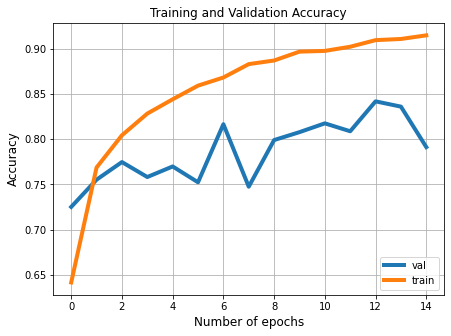

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

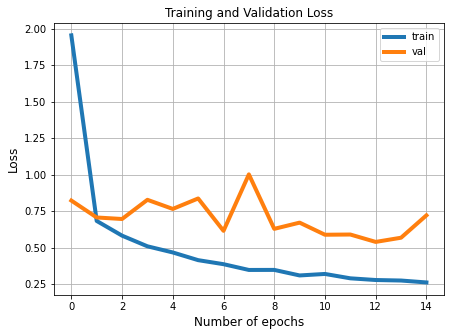

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()

In [ ]:
from PIL import Image
import matplotlib.image as mpimg
import cv2

input the path of validation data to test your result

In [ ]:
#input 
input="/content/drive/MyDrive/tomato/tomato/val/Tomato___Leaf_Mold/0b943ada-01a9-4ce0-a607-e799394856de___Crnl_L.Mold 7008.JPG"

1/1 [==============================] - 0s 27ms/step
3
Leaf Mold


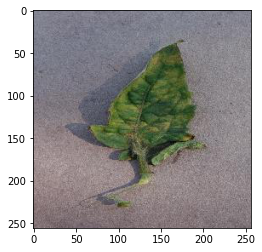

In [ ]:
img_test = cv2.imread(input)
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(input))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)


if input_label == 0:
    print("Bacterial Spot")
elif input_label == 1:
    print("Early Blight")
elif input_label == 2:
    print("Late Blight")
elif input_label == 3:
    print("Leaf Mold")
elif input_label == 4:
    print("Septoria Leaf")
elif input_label == 5:
    print("Spider Mite")
elif input_label == 6:
    print("Target Spot")
elif input_label == 7:
    print("Tomato YellowT")
elif input_label == 8:
    print("Tomato Mosiac Virus")
elif input_label == 9:
    print("Healthy")

test 2

In [ ]:
#input 
input="/content/drive/MyDrive/tomato/tomato/val/Tomato___healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG"


1/1 [==============================] - 0s 23ms/step
9
Healthy


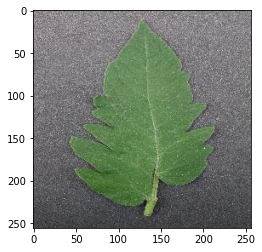

In [ ]:

img_test = cv2.imread(input)
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(input))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)


if input_label == 0:
    print("Bacterial Spot")
elif input_label == 1:
    print("Early Blight")
elif input_label == 2:
    print("Late Blight")
elif input_label == 3:
    print("Leaf Mold")
elif input_label == 4:
    print("Septoria Leaf")
elif input_label == 5:
    print("Spider Mite")
elif input_label == 6:
    print("Target Spot")
elif input_label == 7:
    print("Tomato YellowT")
elif input_label == 8:
    print("Tomato Mosiac Virus")
elif input_label == 9:
    print("Healthy")
